In [58]:
import numpy as np
import torch
import numpy as np
from sklearn.manifold import TSNE
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [102]:
n = np.load("./narrator_batch1.npy", allow_pickle=True)
c = np.load("./character_batch1.npy", allow_pickle=True)

In [103]:
n[0].shape, n[1].shape, n[2].shape

(torch.Size([1, 192, 322]),
 torch.Size([1, 192, 266]),
 torch.Size([1, 192, 104]))

In [104]:
nx = []
cx = []
for i in tqdm(range(len(n))):
    nx.append(list(torch.sum(n[i],axis=2).squeeze().numpy()))
    cx.append(list(torch.sum(c[i],axis=2).squeeze().numpy()))

100%|███| 100/100 [00:04<00:00, 21.74it/s]


In [105]:
nx = np.asarray(nx,dtype='float32')
cx = np.asarray(cx,dtype='float32')

In [106]:
nx_embedded = TSNE(n_components=2,init='random', perplexity=32).fit_transform(nx)

In [107]:
cx_embedded = TSNE(n_components=2,init='random', perplexity=32).fit_transform(cx)

In [108]:
fig = plt.figure(figsize=(6,6))
df_n = pd.DataFrame.from_dict({'x':nx_embedded[:,1],'y':nx_embedded[:,0]})
df_c = pd.DataFrame.from_dict({'x':cx_embedded[:,1],'y':cx_embedded[:,0]})

<Figure size 432x432 with 0 Axes>

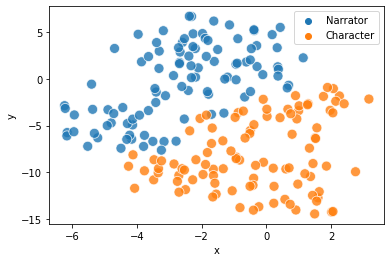

In [157]:
df = pd.concat([df_n,df_c]).reset_index(drop=True)
l_n = ["Narrator"]*100
l_c = ["Character"]*100
la = l_n+l_c
fig = plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x='x',y='y',hue=la,alpha=0.8,s=100)
plt.savefig('VITS_NC.png',bbox_inches='tight',dpi=150)

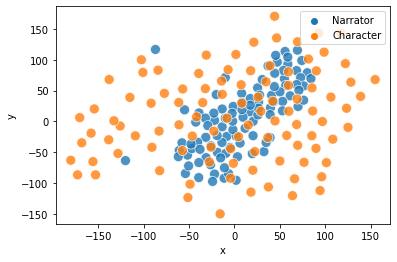

In [158]:
le = l_n+l_c
fig = plt.figure(figsize=(6,4))
le.pop(136)
sns.scatterplot(data=df_sn_new,x='x',y='y',hue=le,alpha=0.8,s=100)
plt.legend(loc='upper right')
plt.savefig('VITS_SN.png',bbox_inches='tight',dpi=150)

In [156]:
len(la)

199

100%|███| 100/100 [00:03<00:00, 31.16it/s]


<AxesSubplot:xlabel='x', ylabel='y'>

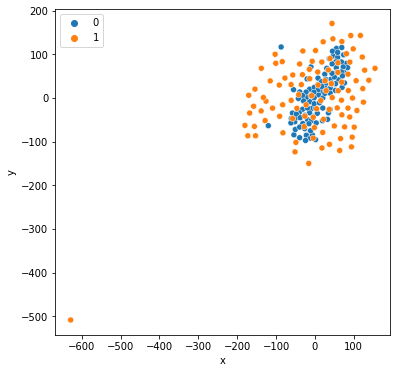

In [65]:
n_sn = np.load("./narrator_batch1_sn.npy", allow_pickle=True)
c_sn = np.load("./character_batch1_sn.npy", allow_pickle=True)

nx_sn = []
cx_sn = []
for i in tqdm(range(len(n_sn))):
    nx_sn.append(list(torch.sum(n_sn[i],axis=2).squeeze().numpy()))
    cx_sn.append(list(torch.sum(c_sn[i],axis=2).squeeze().numpy()))
    
nx_sn = np.asarray(nx_sn,dtype='float32')
cx_sn = np.asarray(cx_sn,dtype='float32')

nx_embedded_sn = TSNE(n_components=2,init='random', perplexity=32).fit_transform(nx_sn)
cx_embedded_sn = TSNE(n_components=2,init='random', perplexity=32).fit_transform(cx_sn)

fig = plt.figure(figsize=(6,6))
df_n_sn = pd.DataFrame.from_dict({'x':nx_embedded_sn[:,1],'y':nx_embedded_sn[:,0]})
df_c_sn = pd.DataFrame.from_dict({'x':cx_embedded_sn[:,1],'y':cx_embedded_sn[:,0]})

<AxesSubplot:xlabel='x', ylabel='y'>

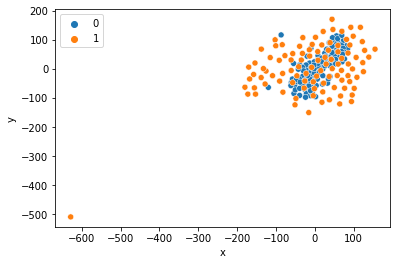

In [89]:
df_sn = pd.concat([df_n_sn,df_c_sn]).reset_index(drop=True)
l_n_sn = [0]*100
l_c_sn = [1]*100
la_sn = l_n_sn+l_c_sn
sns.scatterplot(data=df_sn,x='x',y='y',hue=la_sn)

In [92]:
for i in range(len(df_sn)):
    if df_sn['x'][i]<-400:
        print(i)

136


In [93]:
df_sn_new = df_sn.drop(136).reset_index(drop=True)

In [95]:
la.pop(136)

<AxesSubplot:xlabel='x', ylabel='y'>

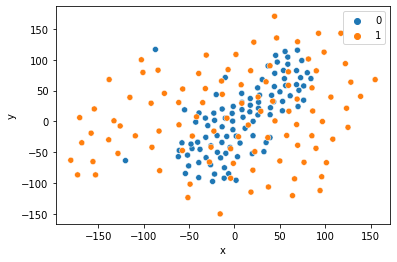

In [97]:
sns.scatterplot(data=df_sn_new,x='x',y='y',hue=la)

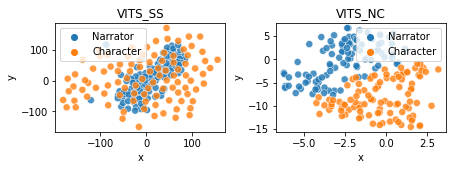

In [179]:
fig, axes = plt.subplots(1, 2, figsize=(7, 2))
axes[0].set_title('VITS_SS')
axes[1].set_title('VITS_NC')
sns.scatterplot(ax = axes[0], data=df_sn_new,x='x',y='y',hue=le,alpha=0.8,s=50)
sns.scatterplot(ax = axes[1], data=df,x='x',y='y',hue=la,alpha=0.8,s=50)
plt.subplots_adjust(wspace = 0.3)
plt.savefig('TSNE.png',bbox_inches='tight',dpi=150)

# VITS_NC

100%|███| 500/500 [00:17<00:00, 28.58it/s]


<AxesSubplot:xlabel='x', ylabel='y'>

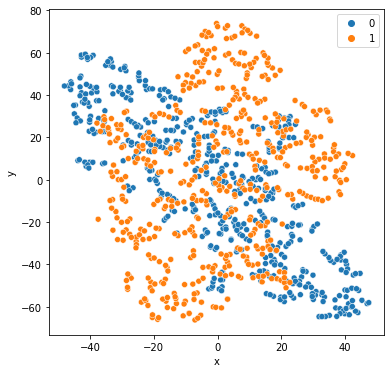

In [100]:
n = np.load("./narrator_batch2.npy", allow_pickle=True)
c = np.load("./character_batch2.npy", allow_pickle=True)

nx = []
cx = []
for i in tqdm(range(len(n))):
    nx.append(list(torch.sum(n[i],axis=2).squeeze().numpy()))
    cx.append(list(torch.sum(c[i],axis=2).squeeze().numpy()))
    
nx = np.asarray(nx,dtype='float32')
cx = np.asarray(cx,dtype='float32')

nx_embedded = TSNE(n_components=2,init='random', perplexity=10).fit_transform(nx)
cx_embedded = TSNE(n_components=2,init='random', perplexity=10).fit_transform(cx)

fig = plt.figure(figsize=(6,6))
df_n = pd.DataFrame.from_dict({'x':nx_embedded[:,1],'y':nx_embedded[:,0]})
df_c = pd.DataFrame.from_dict({'x':cx_embedded[:,1],'y':cx_embedded[:,0]})

df = pd.concat([df_n,df_c]).reset_index(drop=True)
l_n = [0]*len(nx)
l_c = [1]*len(nx)
la = l_n+l_c
sns.scatterplot(data=df,x='x',y='y',hue=la)

# VITS_SN

In [ ]:
n = np.load("./narrator_batch2_sn.npy", allow_pickle=True)
c = np.load("./character_batch2_sn.npy", allow_pickle=True)

nx = []
cx = []
for i in tqdm(range(len(n))):
    nx.append(list(torch.sum(n[i],axis=2).squeeze().numpy()))
    cx.append(list(torch.sum(c[i],axis=2).squeeze().numpy()))
    
nx = np.asarray(nx,dtype='float32')
cx = np.asarray(cx,dtype='float32')

nx_embedded = TSNE(n_components=2,init='random', perplexity=32).fit_transform(nx)
cx_embedded = TSNE(n_components=2,init='random', perplexity=32).fit_transform(cx)

fig = plt.figure(figsize=(6,6))
df_n = pd.DataFrame.from_dict({'x':nx_embedded[:,1],'y':nx_embedded[:,0]})
df_c = pd.DataFrame.from_dict({'x':cx_embedded[:,1],'y':cx_embedded[:,0]})

df = pd.concat([df_n,df_c]).reset_index(drop=True)
l_n = [0]*len(nx)
l_c = [1]*len(nx)
la = l_n+l_c
sns.scatterplot(data=df,x='x',y='y',hue=la)